In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(df)

891

In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.size

10692

In [11]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S


In [14]:
# Missing value

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# missing percentage

In [20]:
(df.isna().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

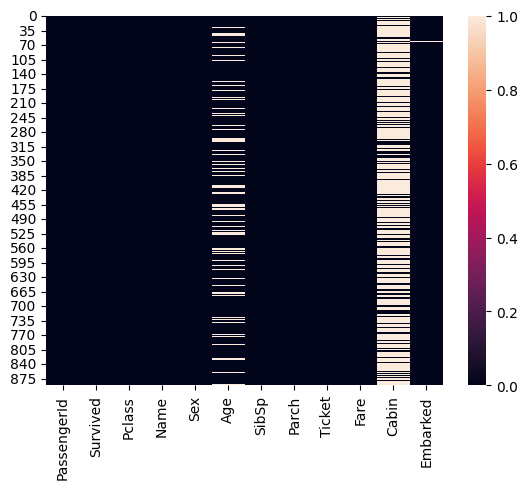

In [22]:
sns.heatmap(df.isna())

In [27]:
# fill misiing values
df['Age'].mean()

29.69911764705882

In [28]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<Axes: >

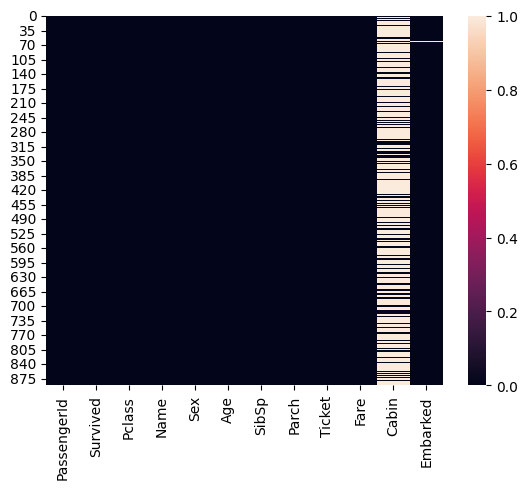

In [29]:
sns.heatmap(df.isna())

In [30]:
# drop column/columns not required

In [31]:
# df.drop('Cabin',axis='columns')
df.drop('Cabin',axis=1,inplace = True)

In [32]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [34]:
df.drop('Embarked',axis=1,inplace = True)

In [35]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


In [37]:
# how to convert textual data to numerical data

In [38]:
# pd.get_dummies()
# Label_Encoder()
# One_Hot_Encoder()
# map() Function
# Ordinal_Encoder()

In [40]:
test_df = pd.DataFrame({'City':['Noida','Delhi','Haryana','Punjab','Delhi'],
             'Price':[23,34,4,56,34]})

test_df

,City,Price
0,Noida,23
1,Delhi,34
2,Haryana,4
3,Punjab,56
4,Delhi,34


In [42]:
pd.get_dummies(test_df['City'],drop_first=True)

,Haryana,Noida,Punjab
0,0,1,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,0


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
ohe = OneHotEncoder(drop='first')

In [53]:
data = ohe.fit_transform(test_df[['City']]).toarray().astype('int')
ohe_df = pd.DataFrame(data,columns=['Haryana','Noida','Punjab'])
ohe_df

,Haryana,Noida,Punjab
0,0,1,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,0


In [55]:
test_df_1 = pd.concat([test_df,ohe_df],axis='columns')
test_df_1

,City,Price,Haryana,Noida,Punjab
0,Noida,23,0,1,0
1,Delhi,34,0,0,0
2,Haryana,4,1,0,0
3,Punjab,56,0,0,1
4,Delhi,34,0,0,0


In [56]:
test_df_1.drop('City',axis=1,inplace=True)

In [57]:
test_df_1

,Price,Haryana,Noida,Punjab
0,23,0,1,0
1,34,0,0,0
2,4,1,0,0
3,56,0,0,1
4,34,0,0,0


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

In [60]:
le.fit_transform(test_df['City'])

array([2, 0, 1, 3, 0])

In [62]:
test_df['City_le'] = le.fit_transform(test_df['City'])

In [64]:
test_df.drop('City',axis=1)

,Price,City_le
0,23,2
1,34,0
2,4,1
3,56,3
4,34,0


In [65]:
order = ['S','M','L','XL','XXL','XXXL']
import random
mart_df = pd.DataFrame({'Size':[random.choice(order) for i in range(15)],
             'Price':np.random.randint(50,75,15)})

mart_df

,Size,Price
0,M,73
1,XXL,69
2,XL,63
3,XXXL,72
4,XXXL,52
5,XL,53
6,XXXL,50
7,S,66
8,XXL,52
9,XXL,50


In [66]:
mart_df['Size'].unique()

array(['M', 'XXL', 'XL', 'XXXL', 'S'], dtype=object)

In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
order

['S', 'M', 'L', 'XL', 'XXL', 'XXXL']

In [72]:
oe = OrdinalEncoder(categories=[order])

In [76]:
mart_df['Size_OE'] = oe.fit_transform(mart_df[['Size']]).astype('int')

In [77]:
mart_df

,Size,Price,Size_OE
0,M,73,1
1,XXL,69,4
2,XL,63,3
3,XXXL,72,5
4,XXXL,52,5
5,XL,53,3
6,XXXL,50,5
7,S,66,0
8,XXL,52,4
9,XXL,50,4


In [86]:
order
number_order = range(len(order)) 
dict(zip(order,number_order))

{'S': 0, 'M': 1, 'L': 2, 'XL': 3, 'XXL': 4, 'XXXL': 5}

In [88]:
mart_df['Size_map'] = mart_df['Size'].map(dict(zip(order,number_order)))

In [89]:
mart_df

,Size,Price,Size_OE,Size_map
0,M,73,1,1
1,XXL,69,4,4
2,XL,63,3,3
3,XXXL,72,5,5
4,XXXL,52,5,5
5,XL,53,3,3
6,XXXL,50,5,5
7,S,66,0,0
8,XXL,52,4,4
9,XXL,50,4,4


In [93]:
df['Gender'] = pd.get_dummies(df['Sex'],drop_first=True)

In [94]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1


In [96]:
df.select_dtypes('object').columns

Index(['Name', 'Sex', 'Ticket'], dtype='object')

In [97]:
df.drop(df.select_dtypes('object').columns,axis=1,inplace=True)

In [98]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


# EDA

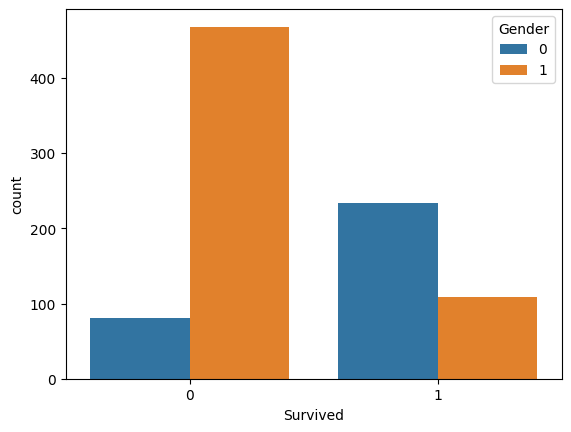

In [101]:
sns.countplot(data=df,x='Survived',hue='Gender')
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

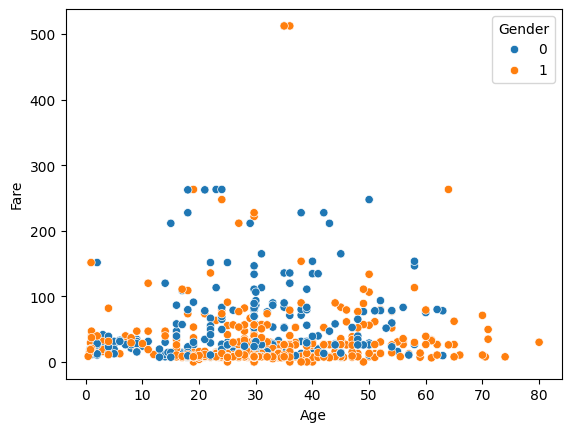

In [103]:
sns.scatterplot(x='Age',data=df,y = 'Fare',hue='Gender')

In [104]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [105]:
X = df.drop('Survived',axis=1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [107]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [109]:
len(X_train)

712

In [110]:
len(X_test)

179

In [111]:
df.shape[0]

891

In [113]:
# 891*0.8

In [114]:
model = LogisticRegression()

In [115]:
model.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
model.score(X_test,y_test)

0.7541899441340782

In [118]:
import warnings
warnings.filterwarnings('ignore')
score_data = {'Random State':[],
             'Score':[]}
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    model = LogisticRegression()  
    model.fit(X_train,y_train)    
    score = model.score(X_test,y_test)
    
    score_data['Random State'].append(i)
    score_data['Score'].append(score)
    
score_df = pd.DataFrame(score_data)
score_df

,Random State,Score
0,0,0.815642
1,1,0.776536
2,2,0.754190
3,3,0.770950
4,4,0.821229
...,...,...
995,995,0.770950
996,996,0.765363
997,997,0.798883
998,998,0.793296


In [120]:
score_df[score_df['Score'] == score_df['Score'].max()]

,Random State,Score
710,710,0.877095


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=710)
model = LogisticRegression()  
model.fit(X_train,y_train)    

LogisticRegression()

In [122]:
model.score(X_test,y_test)

0.8770949720670391

In [123]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [125]:
confusion_matrix(y_test,y_pred)

array([[98, 12],
       [10, 59]], dtype=int64)

In [126]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [127]:
precision_score(y_test,y_pred)

0.8309859154929577

In [128]:
recall_score(y_test,y_pred)

0.855072463768116

In [129]:
f1_score(y_test,y_pred)

0.8428571428571429

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.83      0.86      0.84        69

    accuracy                           0.88       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



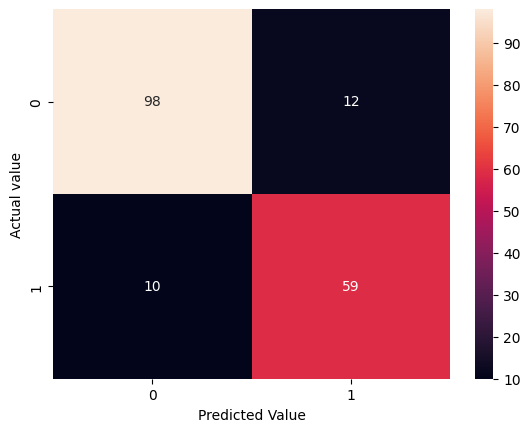

In [137]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')
plt.show()

array([[98, 12],
       [10, 59]], dtype=int64)

In [158]:
d = ['TN','FP','FN','TP']
final_data = []
for i,j in zip(range(len(d)),confusion_matrix(y_test,y_pred).ravel()):
    final_data.append((d[i]+'\n'+str(j)))
    
final_data

['TN\n98', 'FP\n12', 'FN\n10', 'TP\n59']

In [169]:
final =np.array(final_data).reshape(2,2)

In [ ]:
sns.heatmap()

In [167]:
score_df['Score'].min()

0.6871508379888268

array([['TN', 'FP'],
       ['FN', 'TP']], dtype='<U2')

<Axes: >

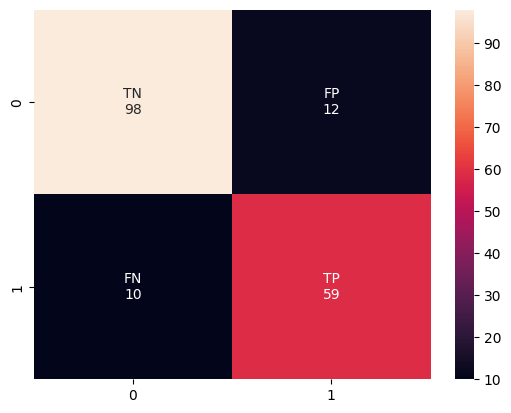

In [178]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=final,fmt='')